<a href="https://colab.research.google.com/github/anejaprerna19/Prediction-of-Client-s-Subscription/blob/main/ML_Problem_Statement_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement 7 :**
You are provided with a dataset containing information about clients' interactions with a bank's
marketing campaign. The target variable is binary, indicating whether a client subscribed to a
term deposit or not (1 for yes, 0 for no). The dataset includes various features such as client
demographics, contact details, and historical campaign information.

**Group Members :**
1. Prerna Aneja : 2023aa05555
2. Anshul : 2023AA05370


In [ ]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
# Importing the dataset
df=pd.read_csv('adst.csv')

**Data Visualization and Exploration**

In [ ]:
# Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


<Axes: >

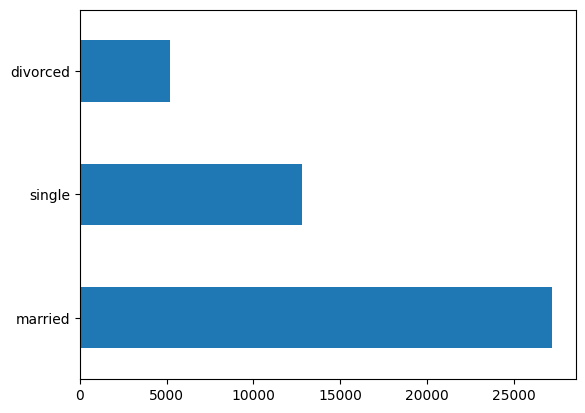

In [ ]:
# Comment on class imbalance with appropriate visualization method
df['marital'].value_counts().plot(kind='barh')

<Axes: >

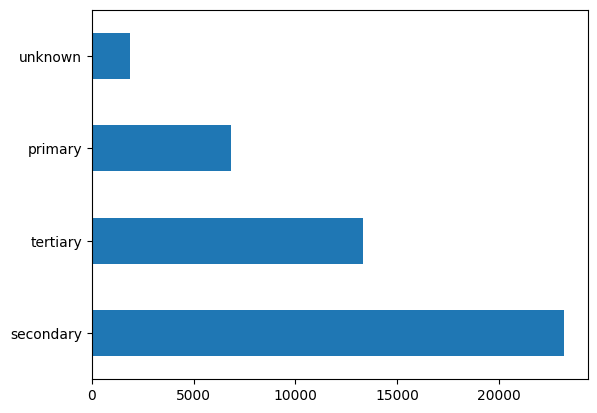

In [ ]:
df['education'].value_counts().plot(kind='barh')

<Axes: >

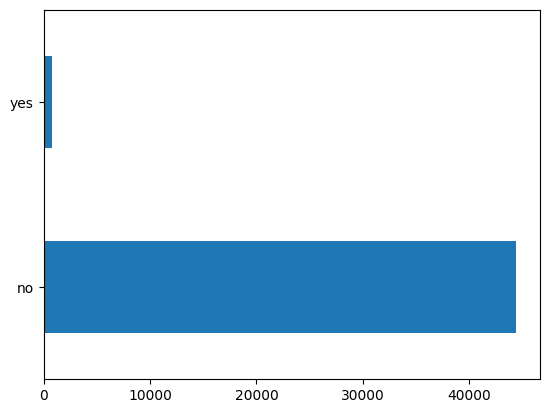

In [ ]:
df['default'].value_counts().plot(kind='barh')

<Axes: >

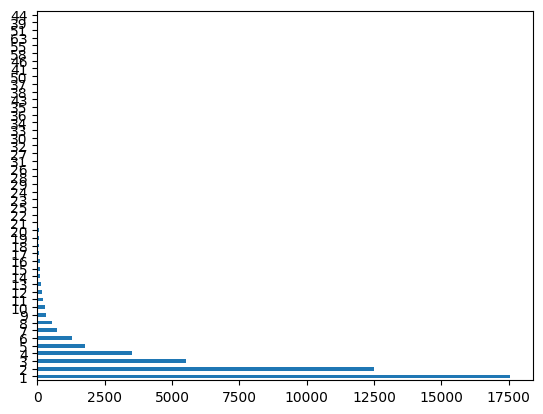

In [ ]:
df['campaign'].value_counts().plot(kind='barh')

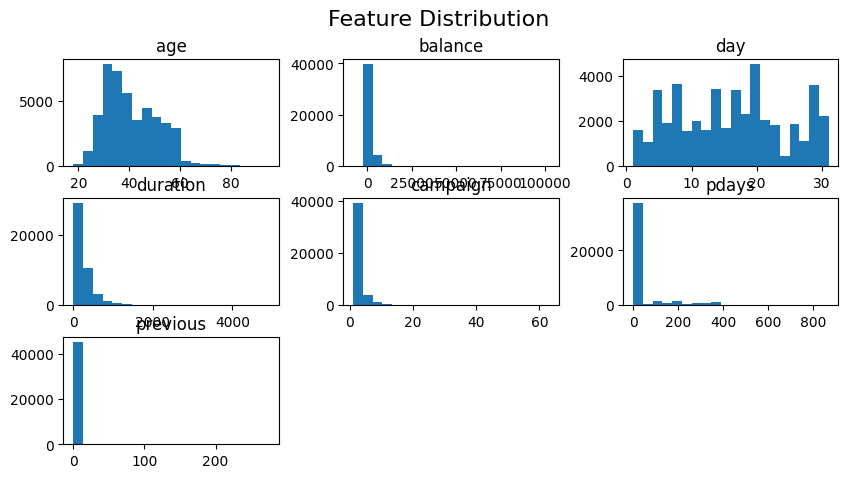

In [ ]:

def show_feature_distributions(df):
    df.hist(bins=20, figsize=(10,5), grid=False)
    plt.suptitle("Feature Distribution", fontsize=16)
    plt.show()


# Feature distribution visualizations
show_feature_distributions(df)

In [ ]:
# Comment on class imbalance with appropriate visualization method
# class count
class_count_0, class_count_1 = df['y'].value_counts()

# Separate class
class_0 = df[df['y'] == 'no']
class_1 = df[df['y'] == 'yes']
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (39922, 17)
class 1: (5289, 17)


<Axes: >

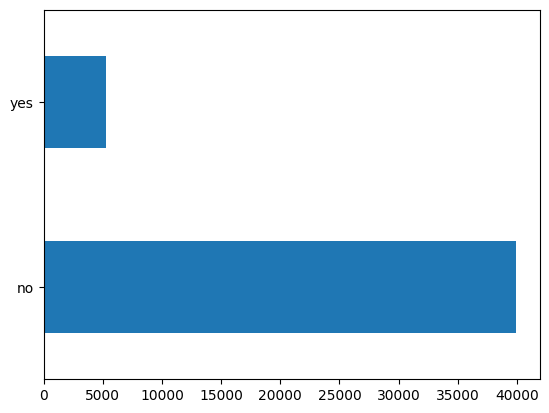

In [ ]:
df['y'].value_counts().plot(kind='barh')

The above plots clearly depicts that there is class imbalance this dataset.So we will apply techniques like UnderSampling/OverSampling/ SMOTE for better model performance.
The problem statement is about client subscribing to a term deposit based on interactions with the bank and we want to avoid false positives. We would be selecting a model for better F1 score here.

In [ ]:
def plot_box_plots(df):
    for col in df.columns:
        plt.figure(figsize=(7,5))
        sns.boxplot(data=df[col],orient='H')
        plt.show

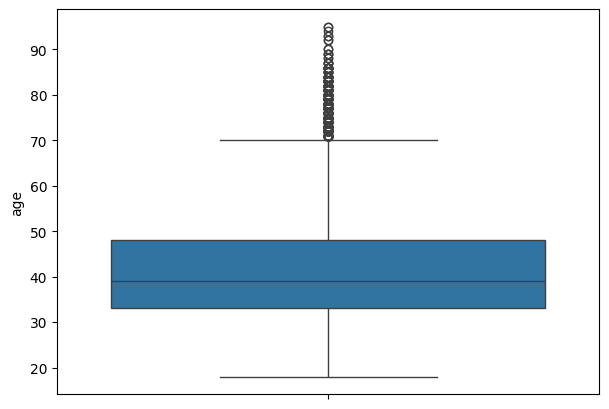

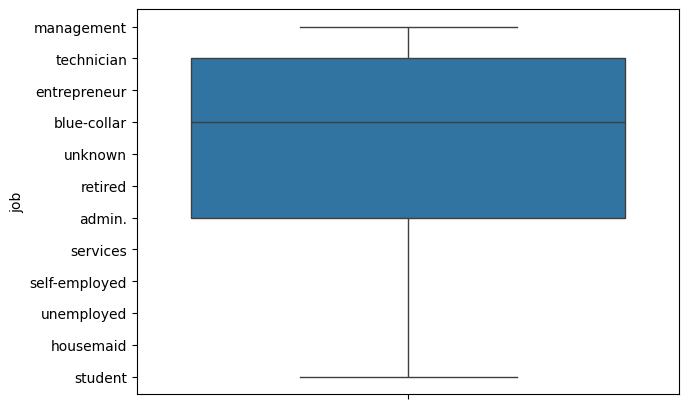

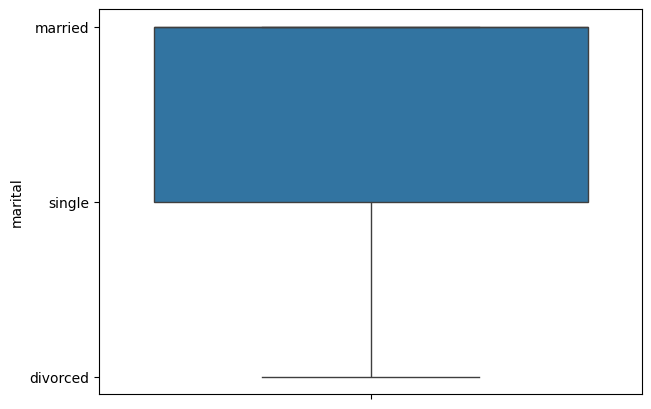

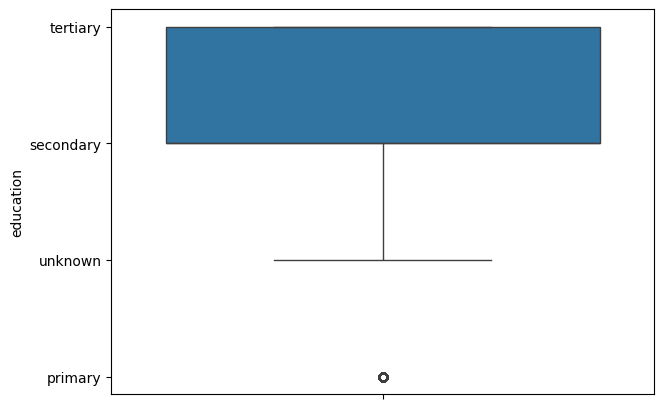

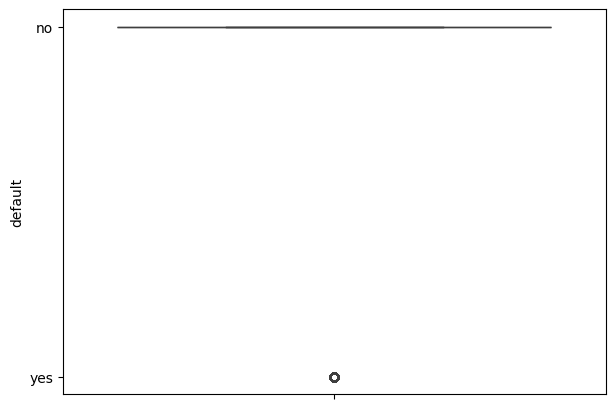

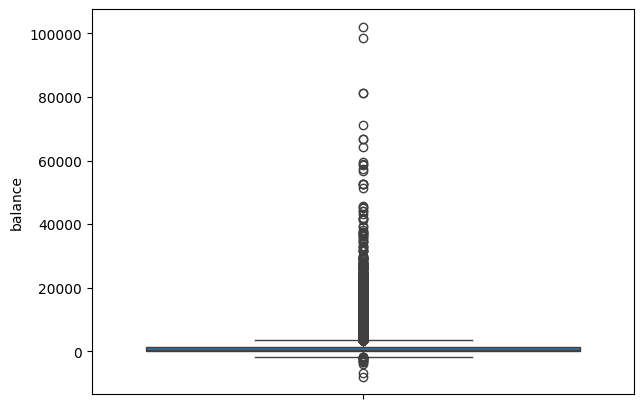

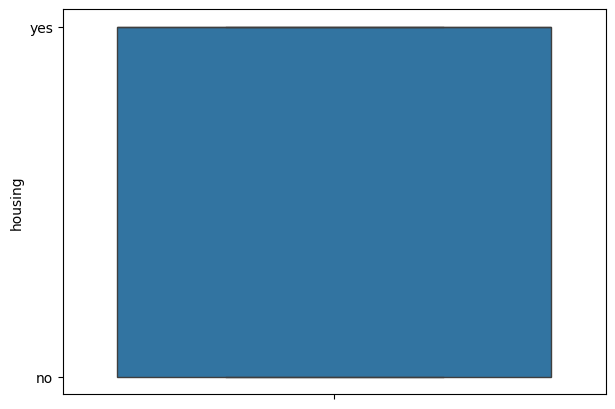

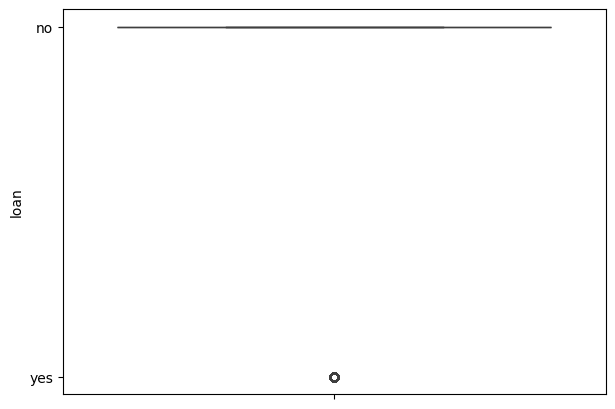

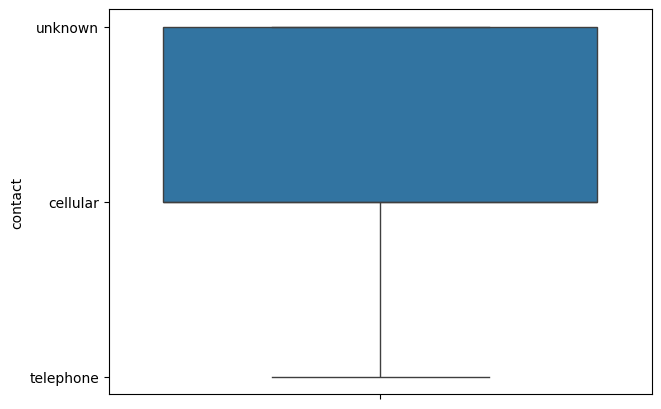

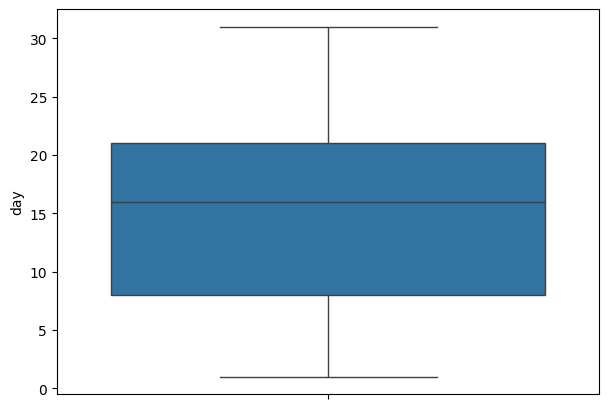

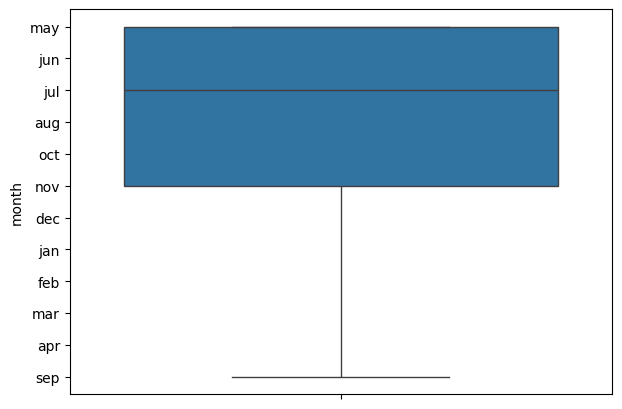

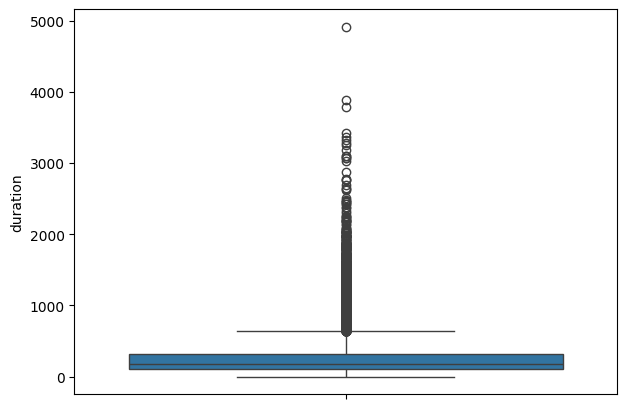

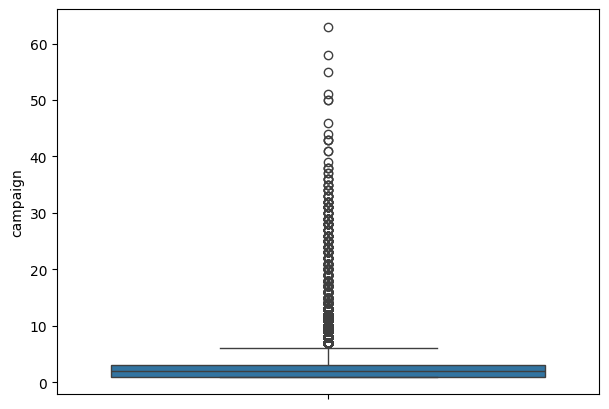

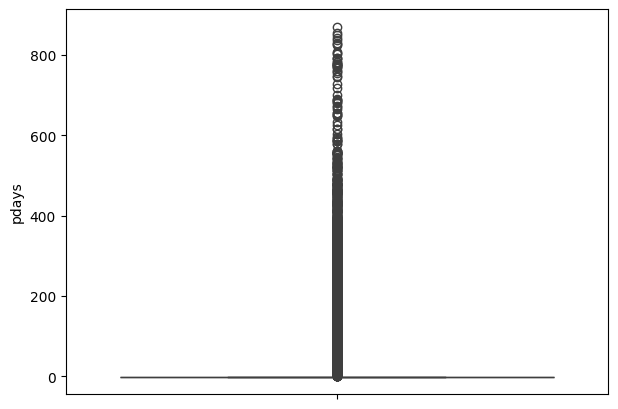

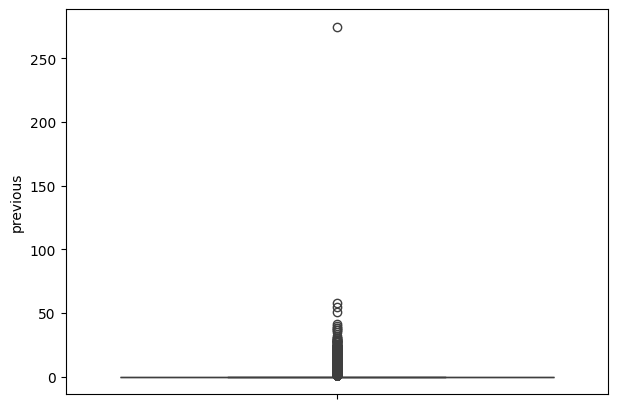

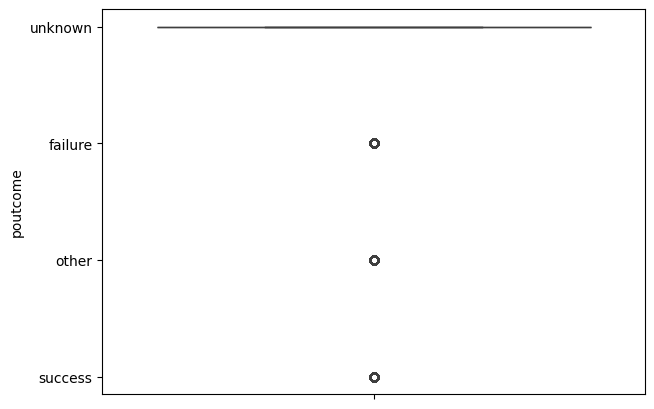

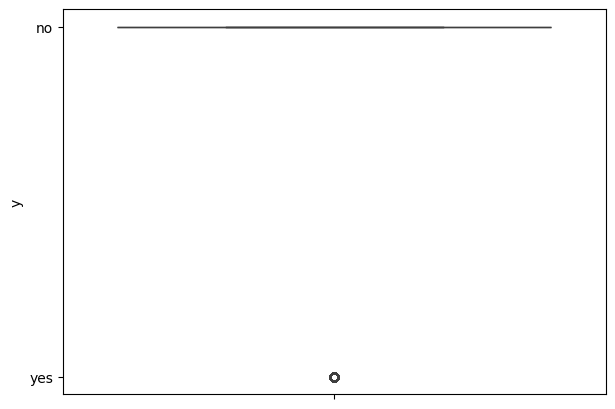

In [ ]:
plot_box_plots(df)

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


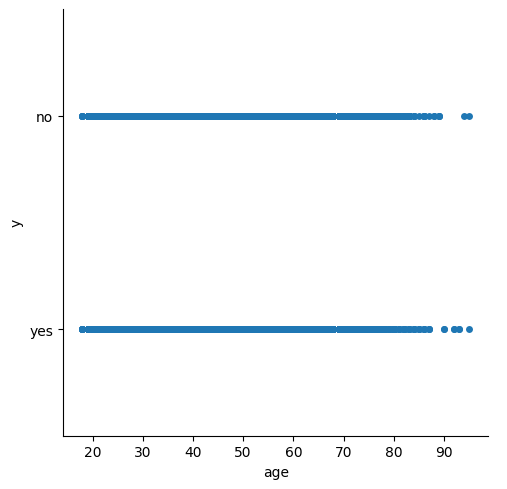

In [ ]:
sns.catplot(data=df, x=df['age'], y=df['y'], jitter=False)

### Insights from the dataset :
1. Following are the features used to predict the target values : age, balance, day, duration, campaign, pdays, previous.
2. There are 45211 rows in the dataset.
3. The mean, max and min values are being printed in the above cell.
4. There are no null values in the dataset.
5. There are 7 numerical features and 9 categorical features.
6. This is a classification problem where the target value can be yes or no.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
def get_feature_cols(df):
    feature_cols=[]
    for col in df.columns:
        if col=='age':
            feature_cols.append(col)
    print(feature_cols)
    return feature_cols

# This removes the outliers
def handle_outliers(df, colm):
    '''Change the values of outlier to upper and lower whisker values '''
    q1 = df.describe()[colm].loc["25%"]
    q3 = df.describe()[colm].loc["75%"]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in range(len(df)):
        if df.loc[i,colm] > upper_bound:
            df.loc[i,colm]= upper_bound
        if df.loc[i,colm] < lower_bound:
            df.loc[i,colm]= lower_bound
    return df
def treat_outliers(df):
    df_outlier_treated = df.copy()
    feature_cols=get_feature_cols(df)
    for col in feature_cols:
        df_outlier_treated = handle_outliers(df_outlier_treated, col)
    return df_outlier_treated

In [ ]:
df_outlier_treated=treat_outliers(df)

['age']


In [ ]:
df_outlier_treated.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df_outlier_treated.shape

(45211, 17)

In [ ]:
# converting yes/no to binary integer
mapping = {'yes': 1, 'no': 0}
df['housing'] = df['housing'].map(mapping)
df['loan'] = df['loan'].map(mapping)
df['default']= df['default'].map(mapping)
print (df.head(5))

   age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
df['y']= df['y'].map(mapping)

In [ ]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
# converting the non-numerical data to numerical form to perform correlation
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df_binary = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)
print(df_binary.head(2))

   age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   

   previous  ...  month_jul  month_jun  month_mar  month_may  month_nov  \
0         0  ...          0          0          0          1          0   
1         0  ...          0          0          0          1          0   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0          0          0               0                 0                 1  
1          0          0               0                 0                 1  

[2 rows x 43 columns]


In [ ]:
def plot_corr(df):
    # d. Correlational analysis and visualization
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='twilight', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

<ipython-input-118-1692c4bec7b8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


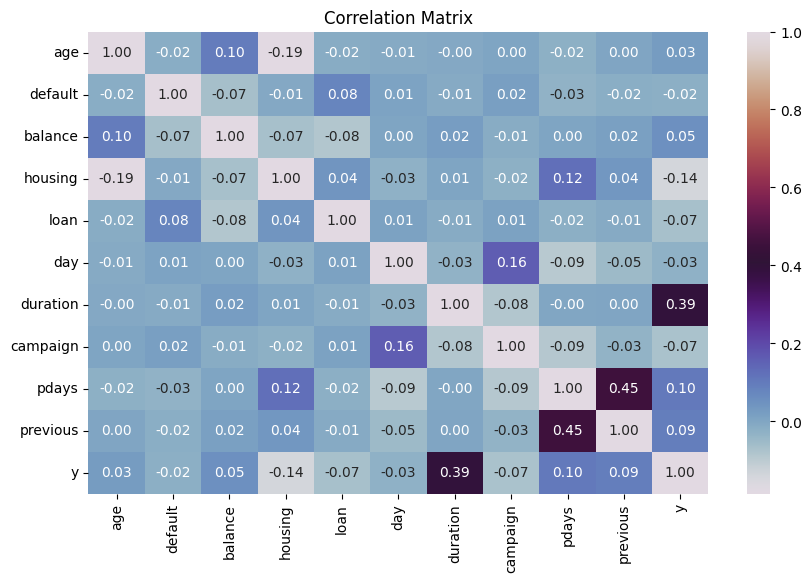

In [ ]:
plot_corr(df)

The heatmap shows correlation among different features. As we see above, most of the features are not highly correlated with eachother. The range lies from -1 to 1 where going towards 1, we can say that the correlation between features is more. Here, we do not see high correlation between any of the features so we can include all for training and testing. Therefore, the feature selection will not be dependent on any metrics which have high correlation

## Data preprocessing and cleaning

1. Identifying null or missing values and replacing them with mean / median / upper value.
2. Handling outliers in the dataset or skewed data

In [ ]:
# Checking for null values
print(df.isnull().sum())
df.head(2)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0


Can see above that there are no null or missing values

In [ ]:
# Detecting and removing outliers using Winsorize Method.
# In the Winsorize Method, we limit outliers with an upper and lower limit.
# We will set the limits. We will make our upper and lower limits for data our new maximum and minimum points.

# Function to winsorize outliers in DataFrame columns
def winsorize_outliers(df, lower_limit_percentile=5, upper_limit_percentile=90):
    for col in df.columns:
      if col =='age' or col=='balance':
        lower_limit = lower_limit_percentile / 100
        upper_limit = upper_limit_percentile / 100
        winsorized_values = winsorize(df[col], limits=(lower_limit, upper_limit))
        df[col] = winsorized_values
    return df

# Winsorize outliers in DataFrame
df = winsorize_outliers(df)

print("DataFrame after Winsorization:")
print(df)

DataFrame after Winsorization:
       age           job   marital  education  default  balance  housing  \
0       29    management   married   tertiary        0        0        1   
1       29    technician    single  secondary        0        0        1   
2       29  entrepreneur   married  secondary        0        0        1   
3       29   blue-collar   married    unknown        0        0        1   
4       29       unknown    single    unknown        0        0        0   
...    ...           ...       ...        ...      ...      ...      ...   
45206   29    technician   married   tertiary        0        0        0   
45207   29       retired  divorced    primary        0        0        0   
45208   29       retired   married  secondary        0        0        0   
45209   29   blue-collar   married  secondary        0        0        0   
45210   29  entrepreneur   married  secondary        0        0        0   

       loan    contact  day month  duration  campaign  p

In [ ]:
df = winsorize_outliers(df)
df.shape

(45211, 17)

In [ ]:
# Check for skewed data
skewness = df.skew()
print(skewness)

age         -3.114779
default      7.245375
balance     -3.560839
housing     -0.224766
loan         1.852617
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
y            2.383480
dtype: float64


<ipython-input-123-ac13e2c74fd0>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


Skewness is an asymmetry in the distribution of data as it does not show any kind of symmetry in continuous data

The skewness value can be positive, negative, or zero, depending on the nature of the distribution:
1. Positive skewness indicates a distribution with a longer right tail (more data points on the right side of the mean).
2. Negative skewness indicates a distribution with a longer left tail (more data points on the left side of the mean).
3. Zero skewness indicates a perfectly symmetrical distribution.
- Previous is very highly skewed - there are more data points on the right side of mean.
- Default is also positive skewed,there are more data points on the right side of mean.
- Balance,housing and age are negatively skewed, there are more data points (more values on left side of mean)
- Pdays and campaign are positively skewed

Let's try removing skewness using log transformation


In [ ]:
#Using Log transformation for skewed numerical columns to remove the skewness
skewed_cols = ['age', 'balance', 'housing', 'loan','day','duration','campaign','pdays','previous','y']

In [ ]:
# Apply log transformation, handling zero and negative values gracefully
for col in skewed_cols:
    # Adding a small constant to handle zero values
    min_val = df[col].min()
    if min_val <= 0:
        min_val = abs(min_val) + 1e-5  # Adding a small epsilon to avoid division by zero

    df[col] = np.log1p(df[col] + min_val)

# Verify the transformation
print(df.head(5))

        age           job  marital  education  default   balance   housing  \
0  4.043051    management  married   tertiary        0  5.153292  0.693152   
1  4.043051    technician   single  secondary        0  5.153292  0.693152   
2  4.043051  entrepreneur  married  secondary        0  5.153292  0.693152   
3  4.043051   blue-collar  married    unknown        0  5.153292  0.693152   
4  4.043051       unknown   single    unknown        0  5.153292  0.000010   

       loan  contact      day month  duration  campaign    pdays  previous  \
0  0.000010  unknown  1.94591   may  5.568345  1.098612  0.00001   0.00001   
1  0.000010  unknown  1.94591   may  5.023881  1.098612  0.00001   0.00001   
2  0.693152  unknown  1.94591   may  4.343806  1.098612  0.00001   0.00001   
3  0.000010  unknown  1.94591   may  4.532600  1.098612  0.00001   0.00001   
4  0.000010  unknown  1.94591   may  5.293305  1.098612  0.00001   0.00001   

  poutcome        y  
0  unknown  0.00001  
1  unknown  0.0000

In [ ]:
# Checking for threshold > 0.5
threshold = 0.5
df['y'] = (df['y'] > threshold).astype(int)

In [ ]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

### Applying appropriate feature engineering techniques for them and applying the feature transformation techniques like Standardization, Normalization, etc.

In [ ]:
# SMOTE
smote = SMOTE(random_state=42)

# Resample data using SMOTE
X_resampled_smote, y_resampled_smote = smote.fit_resample(df.drop(columns=['y','job','marital','education','poutcome','contact','month']), df['y'])

In [ ]:
# ADASYN (Adaptive Synthetic Sampling)
# Initialize ADASYN
adasyn = ADASYN(random_state=42)

# Resample data using ADASYN
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(df.drop(columns=['y','job','marital','education','poutcome','contact','month']), df['y'])

In [ ]:
# Converting categorical columns into numerical
#identify all categorical variables
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

### Model Building
Split the data into train data (80%)
and test data (20%)

In [ ]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['y']), df['y'], test_size=0.2, random_state=42)

In [ ]:
# Using Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Using Logistic Regression
logistic_model = LogisticRegression(random_state=42,max_iter=200)

# Train the Logistic Regression model
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

### Performance evaluation


In [ ]:
# Evaluate Decision Tree Classifier model
y_pred_tree = tree_model.predict(X_test)

# Calculate evaluation metrics for Decision Tree Classifier model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tree)

In [ ]:
# Evaluate Logistic Regression model
y_pred_logistic = logistic_model.predict(X_test)

# Calculate evaluation metrics for Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_logistic)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

In [ ]:
# Print evaluation metrics
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1-score:", f1_logistic)
print("ROC AUC Score:", roc_auc_logistic)
print("Confusion Matrix:\n", conf_matrix)

Logistic Regression Metrics:
Accuracy: 0.8943934534999447
Precision: 0.6263940520446096
Recall: 0.308890925756187
F1-score: 0.4137507673419276
ROC AUC Score: 0.6418071328982142
Confusion Matrix:
 [[7751  201]
 [ 754  337]]


For logistic regression, we were able to achieve a good accuracy of 89.5% with precision of 0.62 and F1 score is 0.41 here which is low.

In [ ]:
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1-score:", f1_tree)
print("ROC AUC Score:", roc_auc_tree)
print("Confusion Matrix:\n", conf_matrix)

Decision Tree Classifier Metrics:
Accuracy: 0.8713922370894615
Precision: 0.4673321234119782
Recall: 0.47204399633363886
F1-score: 0.4696762425900593
ROC AUC Score: 0.6991130444444854
Confusion Matrix:
 [[7751  201]
 [ 754  337]]


For Decision Tree, we were able to achieve a good accuracy of 87.1% with precision of 0.46 and F1 score is 0.46 here which is low.
A low F1 score often signifies a trade-off between recall and precision, implying that the model has trouble striking that balance .F1 score is not okay in both of them

## Assignment PART 2

In [ ]:
# Model Building
# Initialize classifiers
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()
nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier()
adaboost_classifier = AdaBoostClassifier()

# Train classifiers
knn_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
# Performance evaluation
# Define a function to evaluate models and print evaluation metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print("Confusion Matrix:")
    print(confusion)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Accuracy:", accuracy)

# Evaluate K-NN model
print("K-Nearest Neighbors:")
evaluate_model(knn_classifier, X_test, y_test)

# Evaluate SVM model
print("\nSupport Vector Machine:")
evaluate_model(svm_classifier, X_test, y_test)

# Evaluate Naive Bayesian model
print("\nNaive Bayesian:")
evaluate_model(nb_classifier, X_test, y_test)

# Evaluate Random Forest model
print("\nRandom Forest:")
evaluate_model(rf_classifier, X_test, y_test)

# Evaluate Adaboost model
print("\nAdaboost:")
evaluate_model(adaboost_classifier, X_test, y_test)

K-Nearest Neighbors:
Confusion Matrix:
[[7682  270]
 [ 694  397]]
Precision: 0.5952023988005997
Recall: 0.3638863428047663
F1-score: 0.45164960182025027
Accuracy: 0.8933982085591065

Support Vector Machine:
Confusion Matrix:
[[7869   83]
 [ 894  197]]
Precision: 0.7035714285714286
Recall: 0.18056828597616864
F1-score: 0.287381473377097
Accuracy: 0.8919606325334513

Naive Bayesian:
Confusion Matrix:
[[6872 1080]
 [ 596  495]]
Precision: 0.3142857142857143
Recall: 0.4537121906507791
F1-score: 0.3713428357089273
Accuracy: 0.814663275461683

Random Forest:
Confusion Matrix:
[[7673  279]
 [ 587  504]]
Precision: 0.6436781609195402
Recall: 0.461961503208066
F1-score: 0.5378868729989328
Accuracy: 0.9042353201371226

Adaboost:
Confusion Matrix:
[[7694  258]
 [ 681  410]]
Precision: 0.6137724550898204
Recall: 0.3758020164986251
F1-score: 0.4661739624786811
Accuracy: 0.8961627778392126


Random forest could give us best accuracy and F1 score is in good range here (0.5-1). This means that our model can interpret results correctly

### **Fine Tuning of Hyperparameters**

In [ ]:
# Support Vector Machine (SVM)
# Further simplified parameter grid for SVM
param_grid_svm = {'C': [0.1, 1, 10]}

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')

# Perform grid search
grid_search_svm.fit(X_train, y_train)

# Get best parameters
best_params_svm = grid_search_svm.best_params_
print("Best Parameters for SVM:", best_params_svm)

Best Parameters for SVM: {'C': 10}


In [ ]:
# K NN (K Nearest Neighbors)
# Define simplified parameter grid for K-NN
param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance']}

# Initialize GridSearchCV for K-NN
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')

# Perform grid search
grid_search_knn.fit(X_train, y_train)

# Get best parameters
best_params_knn = grid_search_knn.best_params_
print("Best Parameters for K-NN:", best_params_knn)

Best Parameters for K-NN: {'n_neighbors': 7, 'weights': 'uniform'}


In [ ]:
# Random Forest
# Simplified hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize GridSearchCV for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')

# Fit GridSearchCV to training data
grid_rf.fit(X_train, y_train)

# Get best hyperparameters for Random Forest
best_params_rf = grid_rf.best_params_

# Use best hyperparameters to initialize and train Random Forest classifier
random_forest_classifier_tuned = RandomForestClassifier(**best_params_rf)
random_forest_classifier_tuned.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50)

In [ ]:
# AdaBoost
# Simplified hyperparameters for AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 1]
}

# Initialize GridSearchCV for AdaBoost
grid_adaboost = GridSearchCV(AdaBoostClassifier(), param_grid_adaboost, cv=5, scoring='accuracy')

# Fit GridSearchCV to training data
grid_adaboost.fit(X_train, y_train)

# Get best hyperparameters for AdaBoost
best_params_adaboost = grid_adaboost.best_params_

# Use best hyperparameters to initialize and train AdaBoost classifier
adaboost_classifier_tuned = AdaBoostClassifier(**best_params_adaboost)
adaboost_classifier_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

### Performance Evaluation

In [ ]:
# Define evaluation_metrics_tuned as a dictionary
evaluation_metrics_tuned = {}

In [ ]:
import sklearn.metrics as metrics
# Initialize a new K-NN classifier with the best hyperparameters
knn_classifier_tuned = KNeighborsClassifier(**best_params_knn)

# Train the K-NN classifier
knn_classifier_tuned.fit(X_train, y_train)

# Predict on the test set using the tuned K-NN classifier
y_pred_knn_tuned = knn_classifier_tuned.predict(X_test)

# Calculate evaluation metrics for K-NN classifier
precision_knn = precision_score(y_test, y_pred_knn_tuned)
recall_knn = recall_score(y_test, y_pred_knn_tuned)
f1_knn = f1_score(y_test, y_pred_knn_tuned)
accuracy_knn = accuracy_score(y_test, y_pred_knn_tuned)
misclassification_rate_knn = 1 - accuracy_knn

# Store evaluation metrics in dictionary
evaluation_metrics_tuned['K-NN'] = {
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-score': f1_knn,
    'Accuracy': accuracy_knn,
    'Misclassification Rate': misclassification_rate_knn
}

In [ ]:
# Initialize a new SVM classifier with the best hyperparameters
svm_classifier_tuned = SVC(**best_params_svm)

# Train the SVM classifier
svm_classifier_tuned.fit(X_train, y_train)

# Predict on the test set using the tuned SVM classifier
y_pred_svm_tuned = svm_classifier_tuned.predict(X_test)

# Calculate evaluation metrics for SVM classifier
precision_svm = precision_score(y_test, y_pred_svm_tuned)
recall_svm = recall_score(y_test, y_pred_svm_tuned)
f1_svm = f1_score(y_test, y_pred_svm_tuned)
accuracy_svm = accuracy_score(y_test, y_pred_svm_tuned)
misclassification_rate_svm = 1 - accuracy_svm

# Store evaluation metrics in dictionary
evaluation_metrics_tuned['SVM'] = {
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1-score': f1_svm,
    'Accuracy': accuracy_svm,
    'Misclassification Rate': misclassification_rate_svm
}

In [ ]:
# Initialize a new Random Forest classifier with the best hyperparameters
rf_classifier_tuned = RandomForestClassifier(**best_params_rf)

# Train the Random Forest classifier
rf_classifier_tuned.fit(X_train, y_train)

# Predict on the test set using the tuned Random Forest classifier
y_pred_rf_tuned = rf_classifier_tuned.predict(X_test)

# Calculate evaluation metrics for Random Forest classifier
precision_rf = precision_score(y_test, y_pred_rf_tuned)
recall_rf = recall_score(y_test, y_pred_rf_tuned)
f1_rf = f1_score(y_test, y_pred_rf_tuned)
accuracy_rf = accuracy_score(y_test, y_pred_rf_tuned)
misclassification_rate_rf = 1 - accuracy_rf

# Store evaluation metrics in dictionary
evaluation_metrics_tuned['RF'] = {
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-score': f1_rf,
    'Accuracy': accuracy_rf,
    'Misclassification Rate': misclassification_rate_rf
}

In [ ]:
# Initialize a new Adaboost classifier with the best hyperparameters
ab_classifier_tuned = AdaBoostClassifier(**best_params_adaboost)

# Train the Adaboost classifier
ab_classifier_tuned.fit(X_train, y_train)

# Predict on the test set using the tuned Adaboost classifier
y_pred_ab_tuned = ab_classifier_tuned.predict(X_test)

# Calculate evaluation metrics for Adaboost classifier
precision_ab = precision_score(y_test, y_pred_ab_tuned)
recall_ab = recall_score(y_test, y_pred_ab_tuned)
f1_ab = f1_score(y_test, y_pred_ab_tuned)
accuracy_ab = accuracy_score(y_test, y_pred_ab_tuned)
misclassification_rate_ab = 1 - accuracy_ab

# Store evaluation metrics in dictionary
evaluation_metrics_tuned['adaBoost'] = {
    'Precision': precision_ab,
    'Recall': recall_ab,
    'F1-score': f1_ab,
    'Accuracy': accuracy_ab,
    'Misclassification Rate': misclassification_rate_ab
}

In [ ]:
# Display evaluation metrics
for model, metrics in evaluation_metrics_tuned.items():
    print(model + " Metrics:")
    for metric, value in metrics.items():
        print(metric + ": ", value)
    print('\n')

K-NN Metrics:
Precision:  0.6365159128978225
Recall:  0.3483043079743355
F1-score:  0.4502369668246446
Accuracy:  0.8973791883224593
Misclassification Rate:  0.10262081167754067


SVM Metrics:
Precision:  0.7097902097902098
Recall:  0.1860678276810266
F1-score:  0.29484386347131447
Accuracy:  0.8926241291606768
Misclassification Rate:  0.1073758708393232


RF Metrics:
Precision:  0.640268456375839
Recall:  0.43721356553620533
F1-score:  0.5196078431372549
Accuracy:  0.9024659957978547
Misclassification Rate:  0.09753400420214531


adaBoost Metrics:
Precision:  0.6355140186915887
Recall:  0.37396883593033914
F1-score:  0.47085978072706286
Accuracy:  0.898595598805706
Misclassification Rate:  0.10140440119429395




### **Comparison and Analysis***

In [ ]:
# Create DataFrame for comparison
df_comparison = pd.DataFrame(evaluation_metrics_tuned).T
print("Performance Comparison:")
print(df_comparison)

# Analysis and recommendations
# Compare the performance of each classifier based on different evaluation metrics
# Identify which classifier performs best overall and in specific metrics (e.g., accuracy, precision, recall)
# Provide insights into the strengths and weaknesses of each classifier
# Recommend the ML model that demonstrates the most favorable performance and justify your choice

Performance Comparison:
          Precision    Recall  F1-score  Accuracy  Misclassification Rate
K-NN       0.636516  0.348304  0.450237  0.897379                0.102621
SVM        0.709790  0.186068  0.294844  0.892624                0.107376
RF         0.640268  0.437214  0.519608  0.902466                0.097534
adaBoost   0.635514  0.373969  0.470860  0.898596                0.101404


Now, we have evaluated the performance of each classifier and compared their results. Based on the analysis, we can provide recommendations on the most favorable ML model for the given dataset.


Based on above metrics:

Random Forest (RF) has the highest precision, recall, and F1-score among all models. It achieves the best balance between precision and recall, indicating that it can effectively identify both positive and negative instances while minimizing false positives and false negatives.

While Support Vector Machine (SVM) has the highest accuracy, its precision, recall, and F1-score are comparatively lower than Random Forest.

Therefore, considering the overall performance across multiple metrics, Random Forest appears to be the most favorable model for this task.